$\cal{Balty}$ $\cal{Francois}$, $\cal{Dandoy}$ $\cal{Virgile} $

# Travail personnel de Physique Statistique

Nous importons les différentes fonctions qui nous servirons dans la suite.

In [1]:
import numpy
from numpy import cos, sin, log, sqrt, pi, exp

from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams, cm
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
from matplotlib import animation
from IPython.display import HTML
import random

# Questions reliées à la partie 6.2

## 1. Générateurs de distributions gaussiennes et exponentielles 

Dans cette première partie, nous allons importer des bibliothèques Python de générateurs de nombres aléatoires suivant des distributions gaussiennes et exponentielles. Après cela, nous comparerons la distribution renvoyée à celle créée dans la partie 6.2 du MOOC. 

### Distribution Gaussienne


Commençons par la gaussienne. 

In [2]:
from random import gauss    #Nous importons un générateur de nombres aléatoires suivant 
                            #une gaussienne depuis la bibliothèque random de Python.
    
gauss(0,1)

0.3955508754511683

Vérifions si le générateur suit bien une loi gaussienne:

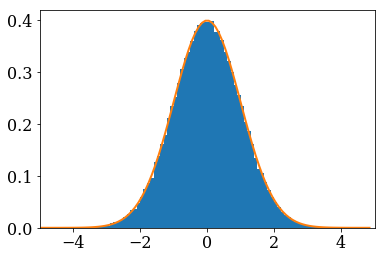

In [3]:
X= numpy.empty(100000)
for i in range (100000):
    X[i]=gauss(0,1)


binwidth1=0.1
pyplot.xlim(-5,5)
pyplot.hist(X,bins=numpy.arange(-5,5, binwidth1),normed=True);
bins1=numpy.arange(-5,5, binwidth1)


xa = bins1[:-1] + binwidth1/2
pyplot.plot(xa,exp(-xa**2/2.0)/sqrt(2*pi),lw=2)

On voit que la distribution créée colle parfaitement avec la courbe de couleur orange représentant la fonction gaussienne N(0,1). Comparons avec la distribution établie dans la partie 6.2:

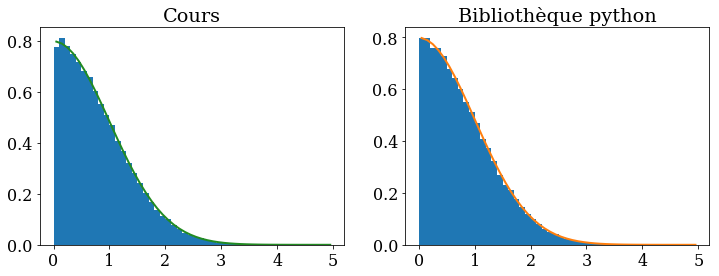

In [4]:
# On reprend les codes établis dans le MOOC sans y toucher.


# Number of random numbers to draw according to p1 
N = 100000
K = 1.4

# Empty list for the final set of numbers
h=[]

for i in range(N):
    u1 = numpy.random.random_sample()
    
    # Distribute g according to the exponential distribution
    g = log(1/(1-u1))
    
    # Generate a second number for the acceptance/rejection condition
    u2 = numpy.random.random_sample()
    
    # Acceptance/rejection step
    ratio = 2*exp(-g**2/2.0)/sqrt(2*pi) / \
                (K*exp(-g))
    if (u2<ratio):
        # Append g to the set h
        h.append(g)


fig = pyplot.figure(figsize=(12,4))

# On affiche le graphe généré par la méthode du MOOC
pyplot.subplot(1,2,1)

# Plots
bins2=numpy.arange(0.,5.1, binwidth1)
pyplot.hist(h,bins=numpy.arange(0.,5., binwidth1),normed=True);
pyplot.title('Cours')
# Compute centers of bins
xb = bins2[:-1] + binwidth1/2
pyplot.plot(xb,2*exp(-xb**2/2.0)/sqrt(2*pi),lw=2,color='forestgreen')

# On affiche le graphe généré avec le générateur Python
pyplot.subplot(1,2,2)

pyplot.hist(X,bins=numpy.arange(0,5, binwidth1),normed=True);
pyplot.title('Bibliothèque python')
pyplot.plot(xb,2*exp(-xb**2/2.0)/sqrt(2*pi),lw=2)

Ces différentes distributions pseudo-aléatoires fonctionnent correctement.

### Distribution exponentielle:

Nous allons faire la même comparaison pour le générateur de distribution Gaussienne.

In [5]:
from random import expovariate
random.expovariate(0.25)

3.7499567849961566

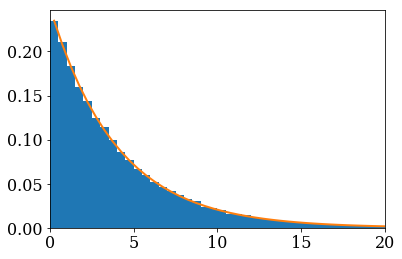

In [6]:
X2= numpy.empty(100000)
for i in range (100000):
    X2[i]=random.expovariate(0.25)

binwidth2=0.5
pyplot.xlim(0,20)
pyplot.hist(X2,bins=numpy.arange(0,21, binwidth2),normed=True);
bins3=numpy.arange(0,21, binwidth2)
xc = bins3[:-1] + binwidth2/2
alpha=0.25
pyplot.plot(xc,alpha*exp(-alpha*xc), lw=2)

En comparant à nouveau à la distribution du 6.2:

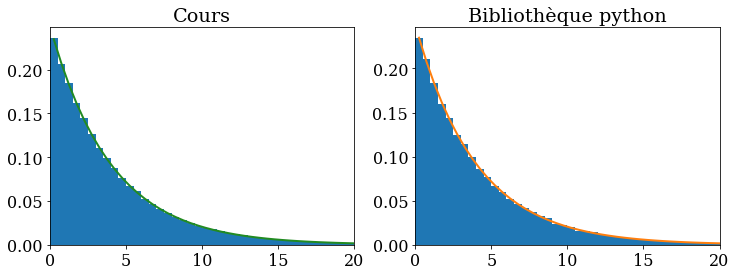

In [7]:
# On reprend le code du MOOC sans y toucher

alpha = 0.25 # rate of the exponential distribution
x = numpy.random.random_sample(100000)
y = -1/alpha*log(1-x)

fig = pyplot.figure(figsize=(12,4))

# On affiche le graphe généré par la méthode du MOOC
pyplot.subplot(1,2,1)

pyplot.xlim(0,20)
pyplot.hist(y,bins3,normed=True);
pyplot.plot(xc,alpha*exp(-alpha*xc), lw=2,color='forestgreen')
pyplot.title('Cours')
# On affiche le graphe généré avec le générateur Python
pyplot.subplot(1,2,2)

pyplot.xlim(0,20)
pyplot.hist(X2,bins=numpy.arange(0,21, binwidth2),normed=True);
pyplot.plot(xc,alpha*exp(-alpha*xc), lw=2)
pyplot.title('Bibliothèque python')

Ici aussi, les distributions engendrées suivent les distributions attendues.

## 2. Méthode de Box-Muller

Dans cette seconde partie, nous devons implémenter la méthode de Box-Muller.
Nous avons trouvé sa définition sur wikipédia (https://fr.wikipedia.org/wiki/M%C3%A9thode_de_Box-Muller) et nous implémenterons la méthode polaire.

In [8]:
def BoxMuller():
    """
    Renvoie un vecteur avec 2 nombres suivant une loi normale N(0,1),
    généré à partir de la méthode de Box-Muller.
    """
    u= numpy.random.random_sample(2)
    BoxMuller=[0,0]
    
    if u[0]==0:
        u[0]=1
        
    if u[1]==0:
        u[1]=1
    
    BoxMuller[0]= sqrt(-2*log(u[0]))*cos(2*pi*u[1])
    BoxMuller[1]= sqrt(-2*log(u[0]))*sin(2*pi*u[1])
    
    return BoxMuller

Vérifions si ce générateur pseudo-aléatoire fonctionne comme attendu:

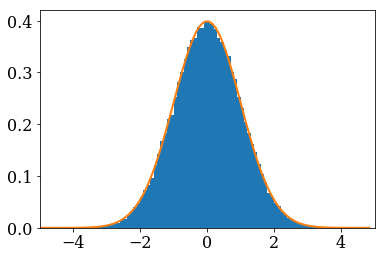

In [9]:
y=numpy.empty(100000)
for i in range(50000):
    y[2*i:2*i+2]=BoxMuller()[0:2]

pyplot.xlim(-5,5)
pyplot.hist(y,bins1,normed=True);

pyplot.plot(xa,exp((-xa**2)/2)/sqrt(2*pi),lw=2)

La distribution obtenue suit une loi N(0,1) comme attendu.

# Questions reliées à la partie 6.3

## 1. Mouvement Brownien avec une contribution systématique constante


Ici nous allons refaire le même développement que dans le module 6.3 du MOOC, au détail près que nous ajouterons une contribution systématique au déplacement $dx$,

$$
dx=cdt+\sqrt{2\alpha dt}\cal{N(0,1)}
$$

avec $c$ une constante.

Regardons le comportement de la marche aléatoire:

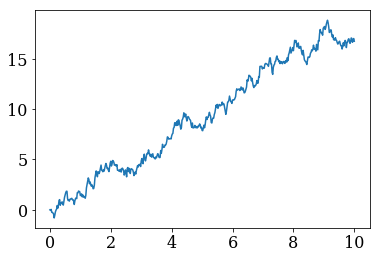

In [10]:
T=10.0       # Temps total de la marche aléatoire 
c=0.5        # Choisis arbitrairement

nt=500       # Nombre d'itérations
dt=T/nt      # Intervalle de temps

alpha=2.0    # On reprend le même coefficient de diffusion qu'au cours

t = numpy.arange(0,T+dt,dt)
xd = numpy.empty(nt+1)         # Positions de la particule
xd[0]=0                   # Condition initiale

# Time integration (note the use of the numpy.random.normal function)
for i in range(nt):
    xd[i+1]=xd[i]+c*dt+sqrt(2*alpha*dt)*numpy.random.normal(0,1)

pyplot.plot(t,xd)


Cherchons l'équation gouvernant l'évolution de la densité $\rho$.


À partir de l'expression $ dx=cdt+\sqrt{2\alpha dt}\cal{N(0,1)}$ on a:
$$ dx-cdt=\sqrt{2\alpha dt}\cal{N(0,1)}=ds $$
On note $x'=x-ct$. Si nous exprimons la densité en fonction de ce x', on a une équation équivalente à celle obtenue dans le MOOC:
$$
\frac{\partial \rho(x',t)}{\partial t}=\alpha \frac{\partial^2 \rho(x',t)}{\partial x'^2}
$$
et ainsi la solution analytique:
$$
\rho(x',t)=\frac{1}{\sqrt{2\pi\sigma_t^2}}e^{-\frac{(x'-\mu)^2}{2\sigma_t^2}}
$$
Pour la réexprimer en fonction de x, on fait:
$$
\rho(x,t)=\rho(x',t)\frac{\partial x}{\partial x'}=\rho(x',t)=\frac{1}{\sqrt{2\pi\sigma_t^2}}e^{-\frac{(x-ct-\mu)^2}{2\sigma_t^2}}
$$
Vérifions si cela concorde en implémentant tout ceci:

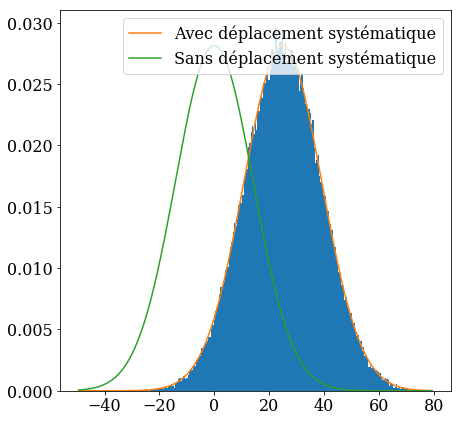

In [11]:
# On prépare une distribution initiale de 100 000 particule suivant N(0,1)
npart=100000
sigma = 1.0
xe = numpy.random.normal(loc=0,scale=sigma,size=npart)

T=50.0      # Temps total de la marche aléatoire
nt=500      # Nombre d'intération
dt=T/nt     # Intervalle de temps


# On laisse le système évoluer
for i in range(nt):
    xe=xe+c*dt+sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)

# On prépare l'histogramme
binwidth=0.5
bins=numpy.arange(-50,80,binwidth)
bins = bins + binwidth/2

bin_centers = bins[:-1]+binwidth/2

    
    
# On vérifie que l'évolution du système concorde avec la solution obtenue
pyplot.figure(figsize=(7,7))
pyplot.hist(xe,bins,normed=True);

sigmat2=2*alpha*T+sigma**2
pyplot.plot(bin_centers, numpy.exp(-(bin_centers-c*T)**2/(2.0*sigmat2))/numpy.sqrt(2*numpy.pi*sigmat2)\
           ,label='Avec déplacement systématique')
pyplot.plot(bin_centers, numpy.exp(-(bin_centers)**2/(2.0*sigmat2))/numpy.sqrt(2*numpy.pi*sigmat2)\
           ,label='Sans déplacement systématique')
pyplot.legend()

Il y a bel et bien correspondance entre le résultat attendu et le résultat obtenu.

## 2. Mouvement Brownien avec force de friction

Dans cette partie nous nous intéresserons à un mouvement brownien avec un composante supplémentaire causée par un certain terme de friction. Dans ce cas la marche aléatoire peut être décrite par l'équation suivante:

$$ dx = -\gamma x dt + \sqrt{2\alpha dt} \cal{N(0,1)}$$


À quoi nous attendons-nous? 

Le terme $-\gamma x dt$ contribue de manière à recentrer notre particule sur la position de référence.
En effet, si elle a une position $x$ positive, la contribution sera négative. Inversément, pour une position $x$ négative, on aura une contribution positive. Dans ces deux cas de figure, la particule sera poussée à retourner à la position nulle. Regardons ce qu'il se passe pour différentes valeurs de $\gamma$.

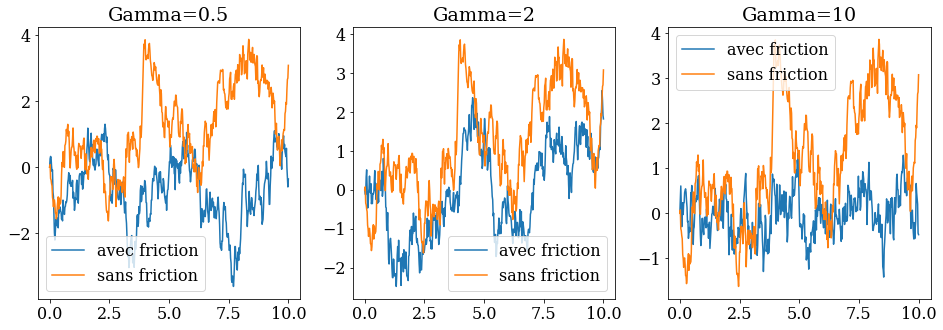

In [12]:

T=10.0            #Temps total du mouvement brownien
nt=500            #Nombre de step 
dt=T/nt
alpha=2.0
gamma=[0,0.5,2,10]         #Valeur de la constante de friction 

t = numpy.arange(0,T+dt,dt)
xf = numpy.empty((4,nt+1))
xf[0][0]=0
xf[1][0]=0
xf[2][0]=0
xf[3][0]=0


for j in range(4):
    for i in range(nt):
        xf[j][i+1]=xf[j][i]-gamma[j]*xf[j][i]*dt+sqrt(2*alpha*dt)*numpy.random.normal(0,1)

        
pyplot.figure(figsize=(16,5))

pyplot.subplot(1,3,1)

pyplot.plot(t,xf[1],label=r'avec friction')
pyplot.plot(t,xf[0],label=r'sans friction')
pyplot.title('Gamma=0.5')
pyplot.legend(loc=0)

pyplot.subplot(1,3,2)

pyplot.plot(t,xf[2],label=r'avec friction')
pyplot.plot(t,xf[0],label=r'sans friction')
pyplot.title('Gamma=2')
pyplot.legend(loc=0)

pyplot.subplot(1,3,3)

pyplot.plot(t,xf[3],label=r'avec friction')
pyplot.plot(t,xf[0],label=r'sans friction')
pyplot.title('Gamma=10')
pyplot.legend(loc=0)

De fait, nous remarquons que les particules avec un terme de friction restent plus stables autour de leur position initiale (qui là était la position de référence, la position nulle). Ce comportement est d'autant plus marqué pour les valeurs de $\gamma$ plus grandes (attention tout de même qu'à partir d'un $\gamma$ trop grand, cette affirmation ne sera plus correcte).

À présent, prenons un plus grand échantillon de particules et distribuons leurs positions suivant une gaussienne centrée en 0.

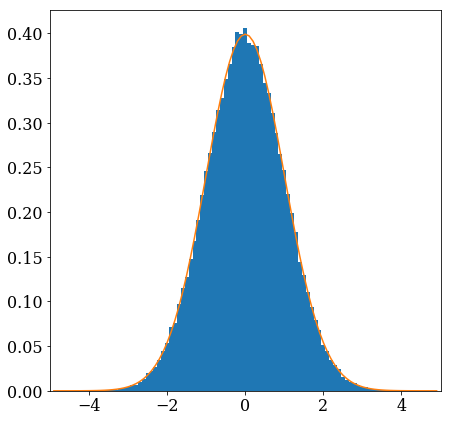

In [13]:
npart=100000      #Nous prenons 100000 particules


sigma = 1.0       #Ecart type de notre gaussienne
x0 = numpy.random.normal(loc=0,scale=sigma,size=npart)    #On initialise les positions initiales


binwidth=0.1
bins=numpy.arange(-5,5,binwidth)
bins = bins + binwidth/2


bin_centers = bins[:-1]+binwidth/2

pyplot.figure(figsize=(7,7))
pyplot.xlim(-5,5)
pyplot.hist(x0,bins,normed=True);
pyplot.plot(bin_centers, numpy.exp(-bin_centers**2/(2.0*sigma**2))/numpy.sqrt(2*numpy.pi*sigma**2))

Maintenant que nous avons initialisé les positions, faisons évoluer nos particules selons la marche aléatoire décrite plus haut (nous allons prendre $\gamma=0.5$, choisi arbitrairement): 

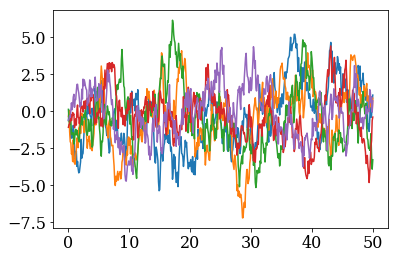

In [14]:
T=50.0            #Temps total de la marche aléatoire
nt=500
dt=T/nt
alpha=2.0
gamma=0.5

t = numpy.arange(0,T+dt,dt)
xg = numpy.empty([nt+1,npart])

xg[0]=x0

for i in range(nt):
    xg[i+1]=xg[i]-gamma*xg[i]*dt+sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)
    
for i in range(5):                      #Regardons l'évolution de 5 d'entre elles
    pyplot.plot(t,xg[:,i])

    

Comme attendu, les particules sont confinées à une certaine distance de 0. 
Regardons quelle est la distribution des particules:


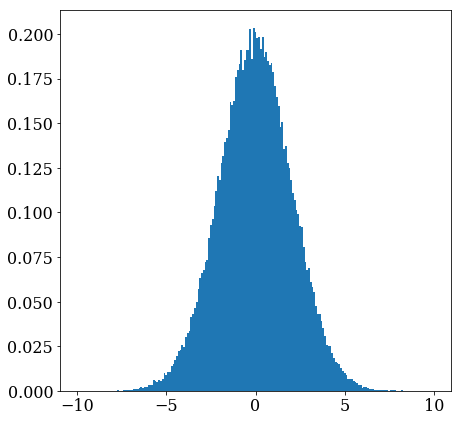

In [15]:
bins=numpy.arange(-10,10,binwidth)
bins = bins + binwidth/2

bin_centers = bins[:-1]+binwidth/2
pyplot.figure(figsize=(7,7))
pyplot.hist(xg[nt],bins,normed=True);

Il est bien visible que la gaussienne s'est nettement moins "étalée" sous l'action du terme de friction comparée au cas vu dans le cours. Regardons l'évolution de notre distribution initiale par l'intermédiaire d'une animation:

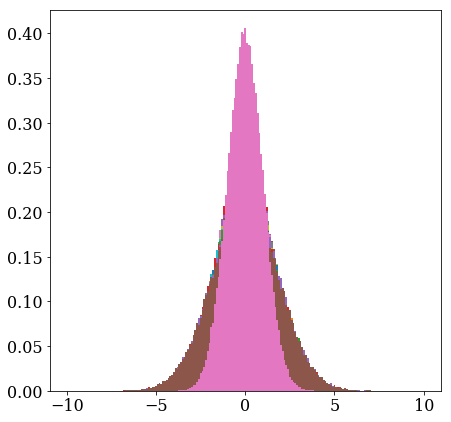

In [16]:
dt=0.1               # On garde le meme pas de temps que précédemment 
it=15

xh = numpy.empty([it+1,npart])
xh[0]=x0


fig=pyplot.figure(figsize=(7,7))


def animate(i):
    xh[i+1]=xh[i]-gamma*xh[i]*dt+sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)
    pyplot.hist(xh[i],bins,normed=True);
    
    
anim = animation.FuncAnimation(fig, animate, frames=it, interval=500)
HTML(anim.to_html5_video())

On observe qu'aux environs de la 10e itération, la distribution ne change plus significativement. Comparons les distributions obtenues après un temps T=50 (déjà calculé auparavant) et T=500. {Nous n'avons pas défini d'unité de temps ici} 

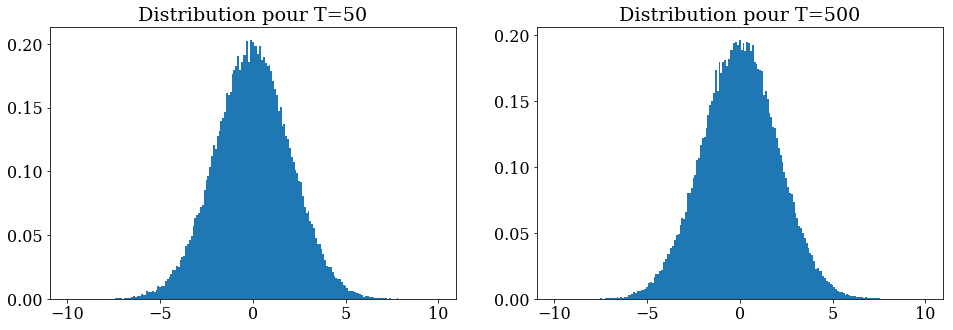

In [17]:
nt=4500       # Puisque dt est le même que précédemment, il faut ajouter 4500 itérations
              # aux 500 précédentes pour arriver à T= 500


xi = numpy.empty(npart)

xi=xg[500].copy()

for i in range(nt):
    xi=xi-gamma*xi*dt+sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)
    
    
pyplot.figure(figsize=(16,5))

pyplot.subplot(1,2,1)
pyplot.hist(xg[500],bins,normed=True);
pyplot.title('Distribution pour T=50')

pyplot.subplot(1,2,2)
pyplot.hist(xi,bins,normed=True);
pyplot.title('Distribution pour T=500')

Ces deux histogrammes ont la même allure alors que nous avons laissé le système évoluer sur 4500 itérations entre les deux. On en conclut avoir atteint un état stationnaire.

#### Que se passe-t-il si la moyenne n'est pas nulle?

Nous l'avons dit, on s'attend à ce que nos particules soient recentrées sur la position de référence nulle. Ainsi, si notre position initiale n'est pas celle-là, nous nous attendons à voir nos particules se déplacer vers la référence et à y rester centrée. Regardons:

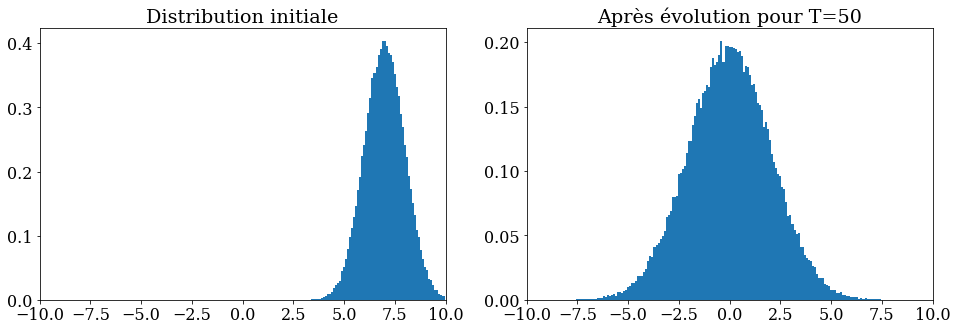

In [18]:
npart=100000      #Nous prenons 100000 particules


sigma = 1.0       #Ecart type de notre gaussienne
xk = numpy.random.normal(loc=7,scale=sigma,size=npart)    #On initialise les positions initiales
x0=xk.copy()


T=50.0            #Temps total de la marche aléatoire
nt=500
dt=T/nt
alpha=2.0
gamma=0.5

t = numpy.arange(0,T+dt,dt)

for i in range(nt):
    xk=xk-gamma*xk*dt+sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)
    

binwidth=0.1
bins=numpy.arange(-10,10,binwidth)
bins = bins + binwidth/2


bin_centers = bins[:-1]+binwidth/2




pyplot.figure(figsize=(16,5))

pyplot.subplot(1,2,1)
pyplot.xlim(-10,10)
pyplot.hist(x0,bins,normed=True);
pyplot.title('Distribution initiale')

pyplot.subplot(1,2,2)
pyplot.xlim(-10,10)
pyplot.hist(xk,bins,normed=True);
pyplot.title('Après évolution pour T=50')

Comme prévu, nos particules sont retournées à la position de référence. Remarquons que la forme de la distribution après évolution est du même type que nos précédentes.

Résumons tout ce que nous venons de voir:

En observant la forme de notre équation, nous avons supposé que les particules suivant celle-ci ont tendance à revenir à la position de référence $x=0$. Ce comportement étant d'autant plus marqué que $\gamma$ est grand (tant qu'il ne tend pas vers l'infini, auquel cas elles oscilleront autour de positions divergentes par rapport à 0). Cette hypothèse a été confirmée par l'expérience en faisant une simulation. Nous avons ensuite observé qu'une position stationnaire était atteinte en quelques itérations seulement. Enfin, nous nous sommes rendu compte que si nos particules initiales étaient éloignées de la position de référence, elles se déplaçaient pour la rejoindre. Nous n'avons pas été capable de déterminer l'équation d'évolution ni la solution de celle-ci mais nous avons en tête le comportement que suivent des particules soumises à cette équation.


# Questions reliées à la partie 6.4

## 1. Modèle d'Ising et transition ferromagnétique

Nous allons dans cette partie tenter de déduire la limite de transition ferromagnétique à l'aide du modèle d'Ising et plus spécifiquement grâce à l'algorithme Metropolis, qui nous permet de simplifier grandement les calculs.
Pour rappel, cette méthode se base sur un procédé stochastique qui à chaque itération choisit une particule et inverse son spin. Rappelons que chaque particule contribue à l'énergie totale par un facteur proportionel à son spin et  celui de ses voisins directs, $E=-J\sum_{pairs(i,j)} s_i s_j,$. À partir de cela, si l'inversion du spin de la particule choisie diminue l'énergie totale, on retient la nouvelle configuration. Dans le cas contraire, le spin de la particule est inversé avec une probabilité donnée par: 

$$ P_{flip} = e^{-\beta \Delta E} $$


Avec $\Delta E=2J s_i \sum_j {s_j}$ la variation d'énergie si le spin de la particule est inversé.

L'algorithme Metropolis nous dit qu'à partir de toutes les configurations obtenues, nous sommes capables de déterminer l'énergie moyenne et la magnétisation moyenne par: 

$$  <E> \space = \frac{\sum_k {E_k}}{N_k}$$

$$ <M> \space = \frac{\sum_k {M_k}}{N_k}$$

Où la somme s'effectue sur les $k$ configurations retenues. 
Notons que notre problème dépend de deux paramètres: la température et la constante  de couplage J.Si nous exprimons l'énergie avec $K_b T$ comme unité et que nous posons: $\alpha = \frac{J}{K_b T}$, la différence d'énergie devient: 

$$\Delta E = 2 \alpha s_i \sum_j {s_j}$$

Avec $[\Delta E] =K_b T$.

Tout l'intérêt de cette partie est de trouver pour quelle valeur de $\alpha$ la transition ferromagnétique s'oppère. Et ainsi pour quelle valeur de $\alpha$, la valeur moyenne de la magnétisation passe de $0$ au palier maximum. 

Commençons par initialiser un système avec tous les spins en mode "up".

In [19]:
nx = 50          #Système de 25x25 particules de spins initialement "up"
ny = 50

sp = numpy.ones([nx,ny])

On introduit la fonction donnée en cours nous permettant de calculer l'énergie d'une particule du système. 

In [20]:
def energy_at_site(sp,alpha,sigma,ix,iy):
  
    
    energy=-alpha*sigma*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx,iy]+sp[ix,(iy-1)%ny]+sp[ix,(iy+1)%ny])

    return energy

Comme explicité plus haut, on implémente la fonction Metropolis du cours qui inverse un des spins et modifie la configuration si les conditions évoquées sont remplies.

(Remarque: une diggression sera faite à la fin de cette partie afin de répondre à un autre challenge du MOOC, à savoir vérifier que metropolis_at_site donne la fraction attendue de spin "up" et "down" pour différentes configurations initiales)

In [21]:
def metropolis_at_site(sp,alpha,ix,iy):
 
    sigma=sp[ix,iy]
    energy_before_flip = energy_at_site(sp,alpha,sigma,ix,iy)
    sigma = -sigma
    energy_if_site_flipped = energy_at_site(sp,alpha,sigma,ix,iy)

    if (numpy.random.random_sample()<numpy.exp(-(energy_if_site_flipped \
                                               -energy_before_flip))):
        sp[ix,iy]=-sp[ix,iy]

Il est à présent temps de stocker les différentes configurations et ainsi d'appliquer sur plusieurs particules la fonction définie juste au-dessus. En particulier, nous allons rassembler plusieurs centaines de configurations différentes du système afin de réaliser la moyenne. 

In [22]:
def ising_model_metropolis(sp, NMC, nx, ny, alpha):

    states = numpy.empty([NMC+1,nx,ny])
    states[0] = sp.copy()
    
    for i in range(1,NMC+1):
        for j in range(0,nx*ny):
            ix=numpy.random.randint(0,nx)
            iy=numpy.random.randint(0,ny)
            metropolis_at_site(sp,alpha,ix,iy)
        states[i]=sp.copy()
    return states


Avec toutes ces fonctions implémentées, nous sommes prêt à étudier la valeur de $\alpha$ pour laquelle il y a une transition.

Pour ce faire, nous allons sonder pour différentes valeurs de $\alpha$ la magnétisation ainsi que l'énergie moyenne des systèmes une fois qu'ils ont atteint une magnétisation relativement stable sous l'action de la fonction ising_model_metropolis. En reportant ces valeurs en fonction de $\alpha$, nous pourrons observer la transition recherchée.

Rappelons que dans le MOOC, nous avons regardé le système pour $\alpha=0.2$ et $\alpha=0.7$ et nous savons que la transition apparait entre ces 2 valeurs. Nous allons donc sonder les magnétisations et énergies entre ces 2 valeurs.

Dans un premier temps, laissons le système évoluer pour 20 valeurs de $\alpha$ pendant 100 configurations:

In [23]:
NMC=100                 # Nombre de configurations
nbalpha=20              # Nombre d'alpha
H=numpy.empty([nbalpha,NMC+1])    # Stockera la somme des spins pour chaque configurations de chaque alpha
A=numpy.linspace(0.2,0.7,nbalpha)  # Espacement uniforme entre tous nos alphas

FinalState=numpy.empty([nbalpha,nx,ny])

for i in range (nbalpha):
    sp=numpy.ones([nx,ny])
    a=A[i]
    I=ising_model_metropolis(sp, NMC, nx, ny, a)
    H[i]=I.sum(axis=(1,2))
    FinalState[i]=I[NMC].copy()               # On stocke la configuration finale pour chaque valeur de alpha

Obeservons l'évolution de nos sommes de spin:

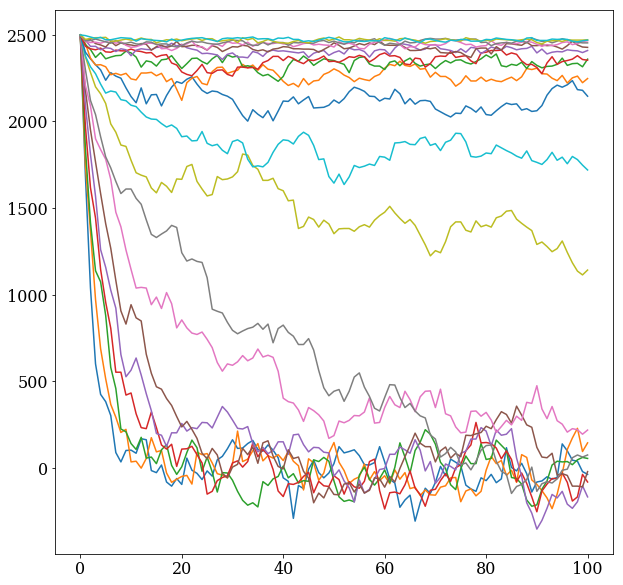

In [24]:
pyplot.figure(figsize=(10,10))
for i in range (nbalpha):
    pyplot.plot(H[i])

La magnétisation a l'air stable pour chaque valeur de $\alpha$ sélectionnées. Préparons-nous à calculer l'énergie totale d'une configuration:

In [25]:
def energie_totale(A,nx,ny,alpha):
    E=0
    for j in range(0,nx):
        for m in range (0,ny):                       # On passe en revue chaque point du système en utilisant
            sigma=A[j,m]                             # la fonction définie plus haut.
            E=E+energy_at_site(A,alpha,sigma,j,m)    
    return E/2                     # On divise par 2 car il faut sommer sur les paires et non sur tous les points.

Nous sommes à présent capable de calculer l'énergie et la magnétisation moyenne. Faisons évoluer notre système sur 500 itérations en reprenant l'état final que nous avions stocké auparavant. Nous calculerons les énergies et magnétisations moyennes des ces 500 configurations.

Nous stockerons nos différentes valeurs dans les matrices:
- M pour la moyenne des magnétisations totales (pour chaque alpha).
- E pour l'énergie moyenne totale (pour chaque alpha).

In [26]:
NMC=500
nbalpha=20
H=numpy.empty([nbalpha,NMC+1])    
M=numpy.empty(nbalpha)             # Magnétisation moyenne pour chaque alpha
A=numpy.linspace(0.2,0.7,nbalpha)  # Tableau de tous les alphas
E=numpy.empty(nbalpha)             # Energie moyenne pour chaque alpha

sp=numpy.empty([nbalpha,nx,ny])


for i in range (nbalpha):
    sp=FinalState[i].copy()
    a=A[i]
    I=ising_model_metropolis(sp, NMC, nx, ny, a)
    H[i]=I.sum(axis=(1,2))
    M[i]=sum(H[i])/(NMC+1)                        # La moyenne est faite sur les magnétisations
    for j in range (NMC+1):
        E[i]=E[i]+energie_totale(I[j],nx,nx,a)   # La moyenne est faite sur les energies
        
    E[i]=E[i]/(NMC+1)

Observons encore l'évolution de notre magnétisation:

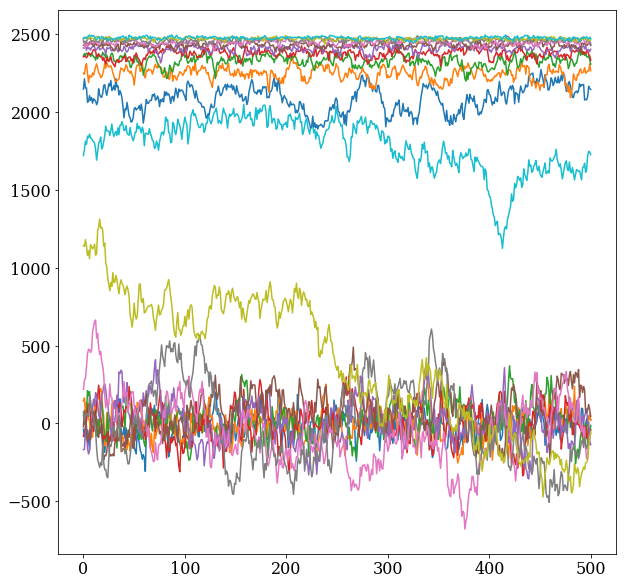

In [27]:
pyplot.figure(figsize=(10,10))
for i in range (nbalpha):
    pyplot.plot(H[i])

Regardons maintenant l'évolution de la valeur de la magnétisation et de l'énergie moyenne en fonction du paramètre $\alpha$:

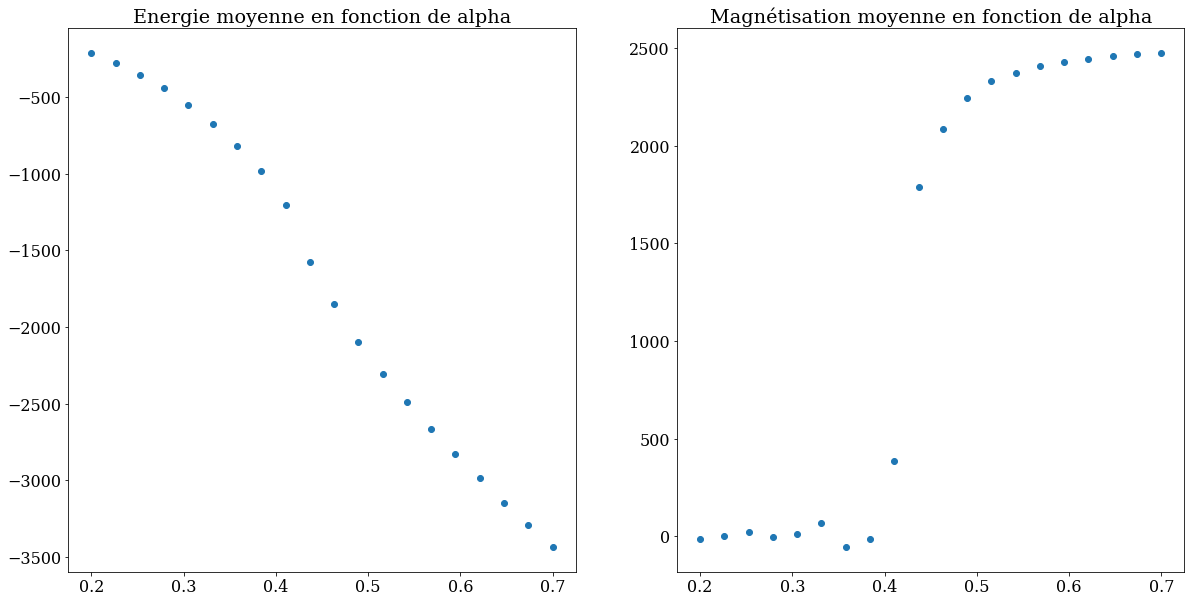

In [28]:
pyplot.figure(figsize=(20,10))

pyplot.subplot(1,2,1)
pyplot.plot(A[:],E[:],'o')
pyplot.title("Energie moyenne en fonction de alpha")

pyplot.subplot(1,2,2)
pyplot.plot(A[:],M[:],'o')
pyplot.title("Magnétisation moyenne en fonction de alpha")

À partir de la magnétisation moyenne, le constat est assez clair: la transition se produit pour un $\alpha=0.42\pm0.02$. Pour ce qui est d'utiliser l'énergie moyenne, la tache est plus complexe puisque la rupture dans l'allure de la courbe est moins nette. Il sera alors préférable de passer par une autre méthode pour déduire la valeur critique de $\alpha$. 
En particulier, nous utiliserons ici la capacité calorifique qui, par définition, présente un "plateau" à l'endroit même du changement de phase. Il s'agit en effet d'une transition du second ordre qui, on le sait, engendre une discontinuité dans la dérivée seconde d'un potentiel thermodynamique (ici l'entropie). Regardons ainsi comment obtenir $C_V$ à partir de notre fonction de l'energie moyenne:

$$
\frac{\partial E}{\partial \alpha}=\frac{\partial E}{\partial T}\frac{\partial T}{\partial \alpha}= C_{V}\left(\frac{-J}{k_b\alpha^2}\right)
$$


On se rend compte que l'on peut exprimer la capacité calorifique à partir de la fonction dérivée de l'énergie moyenne:

$$ C_{V} = \frac{\partial E}{\partial \alpha} \left(\frac{-k_b\alpha^2}{J}\right) $$

A partir de ce résultat, il nous est facile de conclure que notre dérivée représente à un facteur près (dépendant de $\alpha$) notre capacité calorifique. Ainsi, le "plateau" qui apparaitra sur cette fonction sera à une déformation près au même endroit que celui de $C_V$. Construisons donc ce graphe afin d'avoir une autre estimation de la valeur critique de alpha.




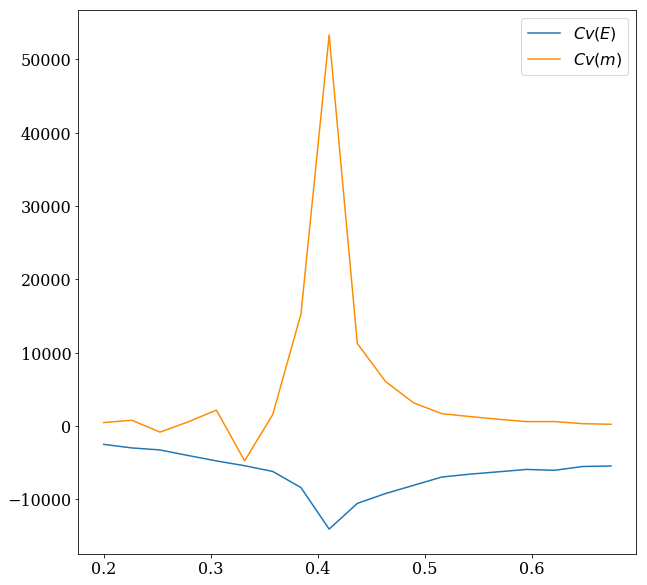

In [29]:
Cve=numpy.empty(19)
Cvm=numpy.empty(19)

for i in range (19):
    Cve[i]=(E[i+1]-E[i])/(A[i+1]-A[i])
    Cvm[i]=(M[i+1]-M[i])/(A[i+1]-A[i])
    
    
pyplot.figure(figsize=(10,10))
pyplot.plot(A[:-1],Cve[:],label=r'$Cv(E)$')
pyplot.plot(A[:-1],Cvm[:],'darkorange',label=r'$Cv(m)$')
pyplot.legend()


Ici, nous pouvons conclure que la transition se fait pour un $\alpha = 0.41\pm 0.05$. Nous avons également superposé la courbe de la dérivée de la magnétisation. Elle suivra en effet des propriétés similaires à celles de la dérivée de l'énergie moyenne évoquées plus haut. Par abus de notation, nous avons appelé nos deux courbes $C_{VE}$ et $C_{VM}$ respectivement, il faut garder en tête que ce n'est pas correct.


Remarque: afin d'avoir un graphique plus précis, nous avons refait tourné le code pour 75 valeurs de $\alpha$ dont 50 comprises entre $0.2$ et $0.7$ et les 25 autres concentrées entre $0.4$ et $0.44$ avec une valeur NMC de 5000. Le code a tourné un peu moins de 8 heures et voici le graphique que nous avons obtenu:




<img src="index.png" width=1000px>

#### Vérification de metropolis_at_site

Comme annoncé plus tot, vérifions le bon fonctionnement de la fonction metropolis_at_site. Pour ce faire, nous importons la fonction proposée pour obtenir une configuration initiale aléatoire:

In [30]:
def initial_state(nx,ny):
       
    # Distribution discrete uniforme entre 0 et 1
    r = numpy.random.randint(0,2,(nx,ny))
    
    # Pour les valeurs de 0, on remplace par -1 pour avoir un spin "down"
    r[r==0] =-1

    return r

À partir de là, nous allons générer 10 configurations initiales aléatoires de dimensions différentes, allant d'une grille 3x10 à une grille 12x10:

In [31]:
nx=10

Conf_Init=[]

for i in range(10):
    Conf_Init.append(initial_state(nx,i+3))

On peut maintenant calculer la probabilité relative des spins attendue, à savoir: $P_{flip}=e^{-\Delta E}=\frac{p(Up)}{p (Down)}$. (Selon la convention utilisée, il se peut que cette probabilité relative soit $\frac{p(Down)}{p(Up}$)

In [32]:
Proba_rel_att=numpy.empty(10)
deltaE=numpy.empty(10)
alpha = 0.1                     # choisi arbitrairement

for i in range(10):
    
    sigma=Conf_Init[i][5][int(len(Conf_Init[i][0])/2)]
    
    deltaE[i]=energy_at_site(Conf_Init[i],alpha,sigma,5,int(len(Conf_Init[i][0])/2)) \
         - energy_at_site(Conf_Init[i],alpha,-sigma,5,int(len(Conf_Init[i][0])/2))
    Proba_rel_att[i]=exp(-deltaE[i])

Maintenant, on calcule le nombre de spin "up" et de spin "down" et on compare le résultat obtenu avec les résultats attendus.

In [33]:
NMC = 100000
Proba_rel=numpy.empty(10)
UpsDowns=[0,0]

for i in range (10):
    states = numpy.empty(NMC+1)
    states[0]=Conf_Init[i][5][int(len(Conf_Init[i][0])/2)]
    
        
    for n in range(0,NMC):
        metropolis_at_site(Conf_Init[i],alpha,5,int(len(Conf_Init[i][0])/2))
        states[n]=Conf_Init[i][5][int(len(Conf_Init[i][0])/2)]
        
    UpsDowns[0] = numpy.extract(states==1, states).size
    UpsDowns[1] = NMC - UpsDowns[0]
    
# Ajout d'une condition supplémentaire pour s'assurer que la convention utilisée est consistante
# avec la probabilité relative attendue.
    
    if deltaE[i]<0:
        Proba_rel[i]=(max(UpsDowns)/min(UpsDowns))
    else:
        Proba_rel[i]=(min(UpsDowns)/max(UpsDowns))
    
print(Proba_rel_att)
print(Proba_rel)

[ 0.67032005  0.44932896  1.4918247   1.4918247   1.4918247   1.4918247
  0.67032005  1.          1.          1.        ]
[ 0.66802889  0.44711518  1.48904819  1.49762725  1.494761    1.4958195
  0.66750042  1.          0.99996     1.        ]


Après comparaison, on se rend compte que les résultats attendus concordent avec les résultats obtenu avec une erreur de l'ordre de 1%.


## 2. Différentes conditions initiales

Nous allons refaire ce qui a été fait dans le MOOC pour le modèle d'ising avec une nouvelle condition initiale.
Au lieu de partir d'une configuration uniforme avec tous les spins "up", nous allons regarder une configuration avec tous les bords "up", le reste distribué aléatoirement. Préparons notre configuration initiale:

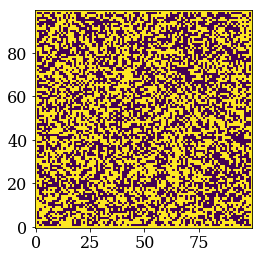

In [41]:
nx = 100
ny = 100

sp=initial_state(nx,ny)
for i in range(nx):
    sp[i,0]=1
    sp[i,nx-1]=1
    sp[0,i]=1
    sp[nx-1,i]=1
pyplot.imshow(sp,interpolation="none",origin='lower')

Comparons maintenant les différentes évolutions d'un système pour $\alpha=0,2$ et $\alpha=0,7$. Nous étudierons sur 100 configurations afin de garder un temps de compilation raisonnable.

In [42]:
# On simule pour alpha=0,2

NMC=100
alpha=0.2

states_0_2 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

# On recrée un état initial

sp=initial_state(nx,ny)
for i in range(nx):
    sp[i,0]=1
    sp[i,nx-1]=1
    sp[0,i]=1
    sp[nx-1,i]=1

# On simule pour alpha=0,7
    
alpha=0.7
states_0_7 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

Une fois ces simulations terminées, animons nos résultats:

In [43]:
fig = pyplot.figure(figsize=(8,4))

pyplot.subplot(1, 2, 1)
img1 = pyplot.imshow(states_0_2[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)

pyplot.subplot(1, 2, 2)
img2 = pyplot.imshow(states_0_7[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)

# Animate
def animate(i):
    img1.set_array(states_0_2[i])
    img2.set_array(states_0_7[i])
    
anim = animation.FuncAnimation(fig, animate, frames=90, interval=200)   # Nous omettons les 10 dernières images car
pyplot.close()                                                          # notre code requiert un taux de donnée supérieur
HTML(anim.to_html5_video())                                             # à la limite tolérée par notre ordinateur.

On remarque que dans la phase ferromagnétique, il se forme des structures à spin up et d'autres à spin down. En regardant les interfaces entre ces structures, on se rend compte que si une partie englobe l'autre, elle aura tendance à la détruire completement, pour une petite structure englobée. Il se peut cependant que certaines interfaces n'englobent pas l'autre et qu'une coexistence se produit.


Regardons l'évolution de la somme des spins:

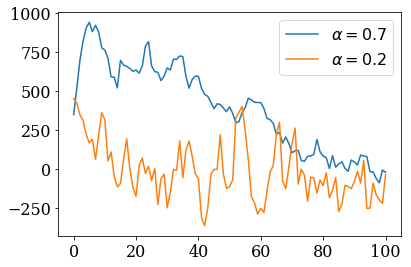

In [44]:
pyplot.figure()
pyplot.plot(states_0_7.sum(axis=(1,2)),label=r'$\alpha=0.7$')
pyplot.plot(states_0_2.sum(axis=(1,2)),label=r'$\alpha=0.2$')
pyplot.legend()
pyplot.tight_layout()

L'équilibre a été atteint pour $\alpha=0.2$ mais pas pour $\alpha=0.7$ Laissons ce système évoluer sur un temps plus long pour voir ce qu'il se passe.

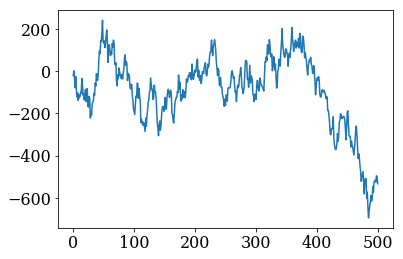

In [45]:
NMC=500
alpha=0.7
nx=100
ny=100

states_0_7bis = ising_model_metropolis(states_0_7[100], NMC, nx, ny, alpha)

pyplot.figure()
pyplot.plot(states_0_7bis.sum(axis=(1,2)))

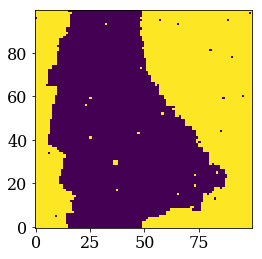

In [46]:
pyplot.imshow(states_0_7bis[NMC],interpolation="none",origin='lower')

In [47]:
fig2 = pyplot.figure(figsize=(8,4))
img = pyplot.imshow(states_0_7bis[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)



def animate2(i):
    img.set_array(states_0_7bis[i])
    
anim2 = animation.FuncAnimation(fig2, animate2, frames=NMC, interval=20)
pyplot.close()
HTML(anim2.to_html5_video())

En faisant tourner ce code plusieurs fois, nous sommes tombés sur différents cas de figure: soit une configuration de spin l'emporte sur l'autre et on finit par avoir un quasi-totalité de spins identiques, soit les structures coexistent et on obtient deux parties distinctes.



# Conclusion

Dans ce module, nous avons été confronté à plusieurs types d'exercices.

Dans un premier temps, nous avons joué avec les distributions pseudo-aléatoires. Nous avons testé deux distributions disponible dans une bibliothèque python et observé que les résultats étaient comparables avec ceux développés dans la partie 6.2 du MOOC. Nous avons aussi implémenté la méthode de Box-Muller qui nous a donné une distribution gaussienne à partir d'une distribution uniforme.

Ensuite, nous avons simulé deux types de mouvement aléatoire de particules: l'un avec une contribution systématique, l'autre avec un terme de friction. Pour la première, nous avons trouvé une solution analytique en effectuant un changement de variable et en reprenant la solution développée dans le 6.3. La solution analytique concordait bien avec l'évolution du système. Pour ce qui est de la seconde, nous n'avons pas obtenu de solution analytique. Cependant, nous avons quand même su déduire quelques informations en observant notre équation. En laissant le système évoluer, nos hypothèses on été confirmées et nous nous sommes satisfaits de ces résultats.

Enfin, nous avons regardé la transition ferromagnétique-paramagnétique par l'intermédiaire du modèle d'Ising. Nous avons déterminé la valeur que prenait un paramètre $\alpha$ (dépendant de la température) lors de cette transition et nous avons conclu que $\alpha=0.42\pm0.02$. Nous avons aussi simulé l'évolution du système si ce dernier avait des spins aléatoires partout sur un domaine et up sur les bords de ce dernier. Nous avons observé qu'avec le temps, des structures de spins identiques se formaient.

En conclusion, nous avons étudié comment se comportaient des générateurs de distributions pseudo-aléatoires numériques et étudié différents cas d'application en physique. Nous constatons que ces derniers s'avèrent très utiles lors de simulations numériques de systèmes physiques microscopiques.